In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import math

# Chapter 2
* [Exercise 2.4](#exercise2.4)<br>
* [Exercise 2.6](#exercise2.6)<br>
* [Exercise 2.7](#exercise2.7)<br>
* [Exercise 2.16](#exercise2.16)<br>
* [Exercise 2.21](#exercise2.21)<br>

### Exercise 2.4 <a class="anchor" id="exercise2.4"></a>

Probability distribution

<BarContainer object of 11 artists>

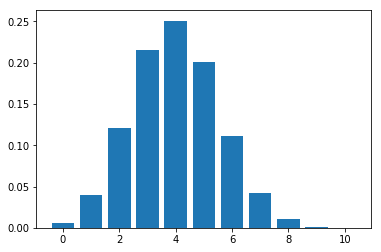

In [18]:
def prob_dist(N, k, b):   
    probs = [binom.pmf(n, N, b/k) for n in range(N + 1)]
    
    return plt.bar(np.arange(0, N + 1, 1), probs)

prob_dist(10, 10, 4)  

Expectation

In [19]:
def expectation(N, f):
    probs = [x * f for x in range(0, N + 1)] 
    
    return probs

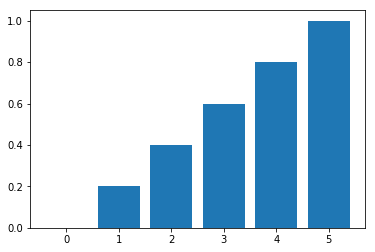

In [20]:
N = 5
f = 0.2
exp = expectation(N, f)

plt.bar(np.arange(0, N + 1, 1), exp)
plt.show()

Variance and standard deviation

In [21]:
def var_std(N, f):
    variance = expectation(N, f)[N] * (1 - f)
    std = math.sqrt(variance)
    
    return print("Variance is", variance, "and standard deviation is", std)

var_std(5, 1/5)

Variance is 0.8 and standard deviation is 0.8944271909999159


### Exercise 2.6 <a class="anchor" id="exercise2.6"></a>

In [22]:
def urns(N, nb):
    prob = []
    res = []
    for x in range(0, N + 1):
        prob.append(binom.pmf(nb, N, x/10)) 
    for i in range(0, N + 1):   
        res.append((binom.pmf(nb, N, i/10))/(sum(prob)))    
    return res

In [23]:
def probs_urns(N, nb):
    for u in np.arange(0, N + 1):
        print ("Urn", u , "has probability", urns(N, nb)[u])

In [24]:
probs_urns(10, 3)

Urn 0 has probability 0.0
Urn 1 has probability 0.06307262464852743
Urn 2 has probability 0.22123978796752994
Urn 3 has probability 0.29321985989557936
Urn 4 has probability 0.23625557435790415
Urn 5 has probability 0.1287785055858141
Urn 6 has probability 0.04666776777440084
Urn 7 has probability 0.009892048584565574
Urn 8 has probability 0.000864217921748162
Urn 9 has probability 9.61326393057878e-06
Urn 10 has probability 0.0


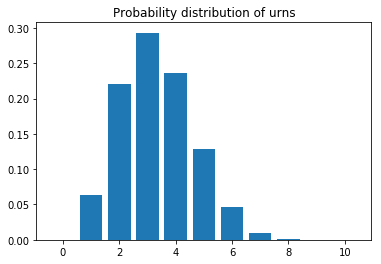

In [25]:
probs = urns(10, 3)
plt.bar(np.arange(0, 11), probs)
plt.title("Probability distribution of urns")
plt.show()

Probability of drawing a black ball in the nth + 1 draw

In [26]:
prob = 0
for u in range(11):
    prob += u/10 * probs[u]
print(prob)


0.3330377815118737


### Exercise 2.7 <a class="anchor" id="exercise2.7"></a>

In [27]:
def prob_nh_given_fh_N(nh, N, fh):
    
    return binom.pmf(nh, N, fh)

In [28]:
def priors(u):
    if u == 1:
        
        return 1    
    
    else:
        
        return [4*x for x in np.arange(0, 0.5, 0.01)] + [-4*x + 4 for x in np.arange(0.5, 1, 0.01)]

In [29]:
def prob_nh_given_N(nh, N, u):   
    
    return np.trapz([prob_nh_given_fh_N(nh, N, fh) for fh in np.arange(0, 1, 0.01)]*np.array(priors(u)), dx=0.01)

In [30]:
def prob_fh_given_nh_N(nh, N, fh, u):
    
    return prob_nh_given_fh_N(nh, N, fh) / prob_nh_given_N(nh, N, u)

a) N = 3; nh = 0

    Uniform prior

In [31]:
probs_0_3_U = ([prob_fh_given_nh_N(0, 3, fh, 1) for fh in np.arange(0, 1, 0.01)]) 

    Non-uniform prior

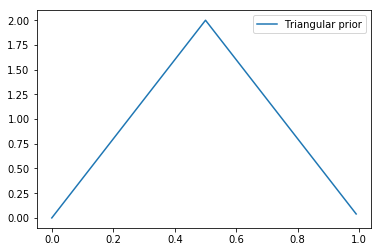

In [35]:
plt.plot(np.arange(0, 1, 0.01), priors(0))
plt.legend(["Triangular prior"])
plt.show()

In [33]:
probs_0_3_NU = np.array([prob_fh_given_nh_N(0, 3, fh, 0) for fh in np.arange(0, 1, 0.01)]) * np.array(priors(0)) 

Difference between uniform and non-uniform priors:

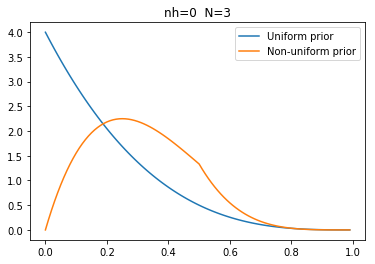

In [38]:
plt.plot(np.arange(0, 1, 0.01), probs_0_3_U)
plt.plot(np.arange(0, 1, 0.01), probs_0_3_NU)
plt.legend(["Uniform prior", "Non-uniform prior"])
plt.title("nh=0  N=3")
plt.show()

Area under both curves:

In [39]:
print("Area under curve for uniform prior: ", round(np.trapz(np.array(probs_0_3_U), dx=0.01)))
print("Area under curve for non-uniform prior: ", round(np.trapz(np.array(probs_0_3_NU), dx=0.01)))

Area under curve for uniform prior:  1.0
Area under curve for non-uniform prior:  1.0


Probability that the N + 1th outcome will be head:

In [40]:
np.trapz(np.arange(0, 1, 0.01) * probs_0_3_U, dx=0.01)

0.1999466575331798

b) N=3; nh=2

In [41]:
probs_2_3_U =[prob_fh_given_nh_N(2, 3, fh, 1) for fh in np.arange(0, 1, 0.01)] * np.array(priors(1)) 

In [42]:
probs_2_3_NU = np.array([prob_fh_given_nh_N(2, 3, fh, 0) for fh in np.arange(0, 1, 0.01)]) * np.array(priors(0)) 

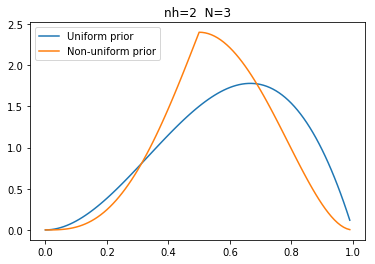

In [45]:
plt.plot(np.arange(0, 1, 0.01), probs_2_3_U)
plt.plot(np.arange(0, 1, 0.01), probs_2_3_NU)
plt.legend(["Uniform prior", "Non-uniform prior"])
plt.title("nh=2  N=3")
plt.show()

In [46]:
print("Area under curve for uniform prior: ", round(np.trapz(np.array(probs_2_3_U), dx=0.01)))
print("Area under curve for non-uniform prior: ", round(np.trapz(np.array(probs_2_3_NU), dx=0.01)))

Area under curve for uniform prior:  1.0
Area under curve for non-uniform prior:  1.0


Probability that the N + 1th outcome will be head:

In [47]:
np.trapz(np.arange(0, 1, 0.01) * probs_2_3_U, dx=0.01)

0.5997304751507321

c) N=10; nh=3

In [48]:
probs_3_10_U =[prob_fh_given_nh_N(3, 10, fh, 1) for fh in np.arange(0, 1, 0.01)] * np.array(priors(1)) 

In [49]:
probs_3_10_NU = np.array([prob_fh_given_nh_N(3, 10, fh, 0) for fh in np.arange(0, 1, 0.01)]) * np.array(priors(0)) 

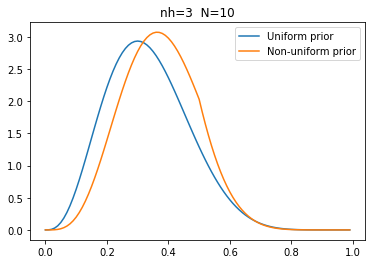

In [53]:
plt.plot(np.arange(0, 1, 0.01), probs_3_10_U)
plt.plot(np.arange(0, 1, 0.01), probs_3_10_NU)
plt.legend(["Uniform prior", "Non-uniform prior"])
plt.title("nh=3  N=10")
plt.show()

In [54]:
print("Area under curve for uniform prior: ", round(np.trapz(np.array(probs_3_10_U), dx=0.01)))
print("Area under curve for non-uniform prior: ", round(np.trapz(np.array(probs_3_10_NU), dx=0.01)))

Area under curve for uniform prior:  1.0
Area under curve for non-uniform prior:  1.0


Probability that the N + 1th outcome will be head:

In [55]:
np.trapz(np.arange(0, 1, 0.01) * probs_3_10_U, dx=0.01)

0.3333332967399367


d) N=300; nh=29

In [56]:
probs_29_300_U =[prob_fh_given_nh_N(29, 300, fh, 1) for fh in np.arange(0, 1, 0.01)] * np.array(priors(1)) 

In [57]:
probs_29_300_NU = np.array([prob_fh_given_nh_N(29, 300, fh, 0) for fh in np.arange(0, 1, 0.01)]) * np.array(priors(0)) 

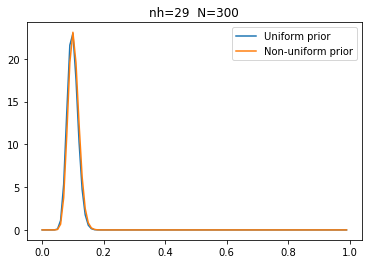

In [58]:
plt.plot(np.arange(0, 1, 0.01), probs_29_300_U)
plt.plot(np.arange(0, 1, 0.01), probs_29_300_NU)
plt.legend(["Uniform prior", "Non-uniform prior"])
plt.title("nh=29  N=300")
plt.show()

In [59]:
print("Area under curve for uniform prior: ", round(np.trapz(np.array(probs_29_300_U), dx=0.01)))
print("Area under curve for non-uniform prior: ", round(np.trapz(np.array(probs_29_300_NU), dx=0.01)))

Area under curve for uniform prior:  1.0
Area under curve for non-uniform prior:  1.0


Probability that the N + 1th outcome will be head:

In [60]:
np.trapz(np.arange(0, 1, 0.01) * probs_29_300_U, dx=0.01)

0.09933774834530912

### Exercise 2.16 <a class="anchor" id="exercise2.16"></a>

Probability distribution of the sum

In [61]:
def dice(faces):
    
    return np.random.choice(np.arange(1, faces + 1))

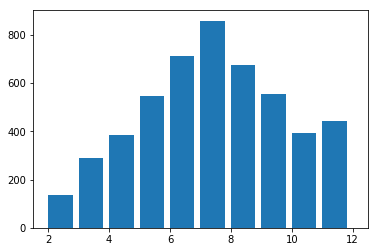

In [62]:
faces = 6
trials = 5000
trials_dice = [dice(faces) + dice(faces) for x in range(trials)]

plt.hist(trials_dice, width=0.8)
plt.show()

Probability distribution of the absolute difference

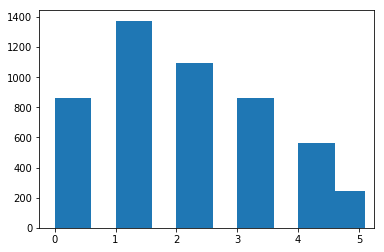

In [63]:
faces = 6
trials = 5000
trials_dice = [abs(dice(faces) - dice(faces)) for x in range(trials)]

plt.hist(trials_dice, width=0.6)
plt.show()

Probability distribution of 100 roll dice

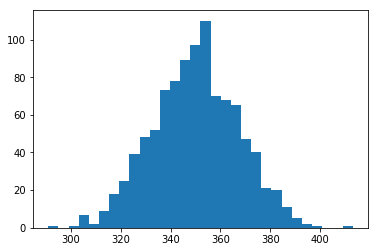

In [64]:
faces = 6
trials = 1000
trials_dice = [np.sum([dice(faces) for i in range(100)]) for j in range(trials)]

plt.hist(trials_dice, bins=30)
plt.show()